## Алгоритм kNN

Реализуем алгоритм kNN с помощью Python.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

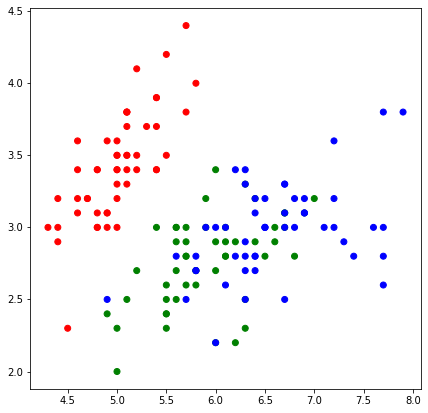

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [5]:
def e_metrics(x1, x2):
    
    return np.sqrt(np.sum((x2-x1)**2))

Реализуем алгоритм поиска k ближайших соседей.

In [12]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Напишем функцию для вычисления точности

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [11]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667


Построим график распределения классов.

In [9]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

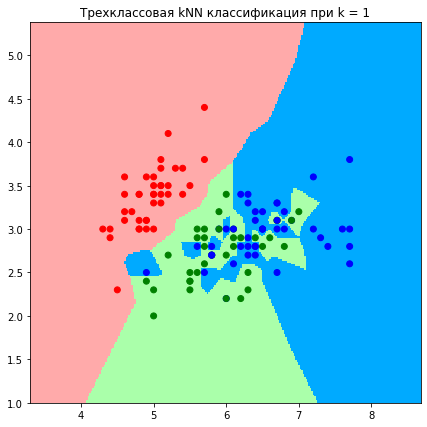

In [10]:
get_graph(X_train, y_train, k)

In [13]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.733


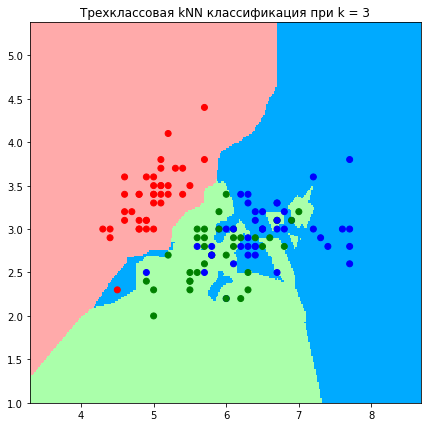

In [14]:
get_graph(X_train, y_train, k)

In [ ]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


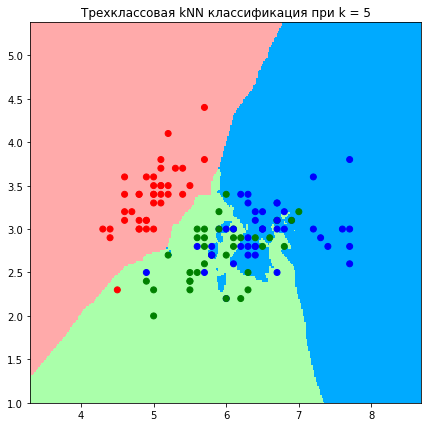

In [ ]:
get_graph(X_train, y_train, k)

In [ ]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.833


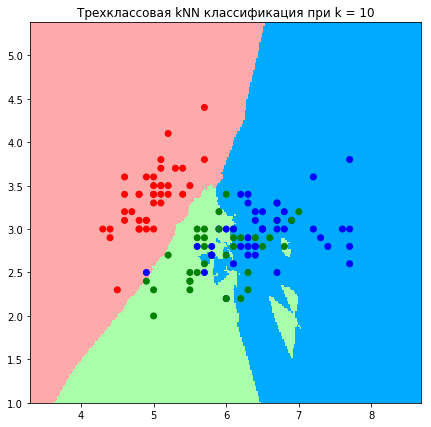

In [ ]:
get_graph(X_train, y_train, k)

### Алгоритм K-means (K-средних)

Одним из самых простых и популярных алгоритмов кластеризации является алгоритм _K-means (K-средних)_. Заключается он в следующих шагах:

1. Выбрать количество кластеров $k$, на которые будут делиться данные.


2. Случайным образом выбрать в пространстве данных $k$ точек $c_{k}$ (центроидов) - центров будущих кластеров.


3. Для каждой точки из выборки посчитать, к какому из центроидов она ближе.


4. Переместить каждый центроид в центр выборки, отнесенной к этому центроиду, определив его как среднее арифметическое всех точек кластера:

$$c_{k} = \frac{\sum_{i=1}^{l}[a(x_{i})=k]x_{i}}{\sum_{i=1}^{l}[a(x_{i}) = k]}.$$


5. Повторить шаги 4-5 до сходимости алгоритма (обычно это оценивается по величине смещения центроида после каждого шага - сходимость означает непревышение смещения какого-то заданного значения).

Результат работы алгоритма значительно зависит от начального выбора центроидов. Существует много методик их выбора, наиболее удачным из которых считается k-means++. Он заключается в последовательном выборе начальных приближений так, что вероятность выбрать в качестве центроида следующую точку пропорциональна квадрату расстояния от нее до ближайшего центроида.

Вначале сгенерируем три облака точек с помощью инструментов `sklearn`.

In [17]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

Изобразим точки на графике.

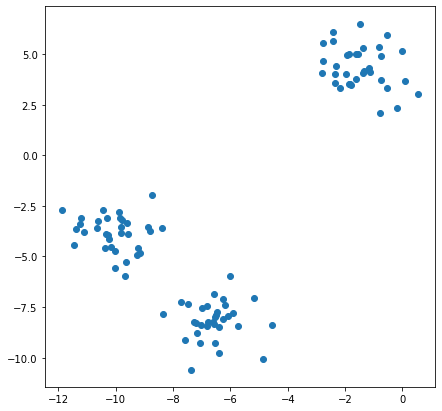

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [20]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

Напишем функцию для визуализации кластеров

In [21]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b', 'm']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [22]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

Проверим результат алгоритма после одной итерации

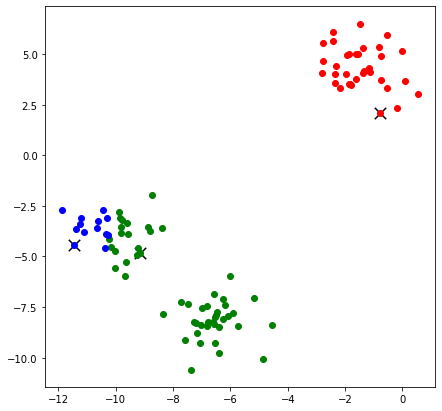

In [23]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

Проверим работу алгоритма при различном числе итераций.

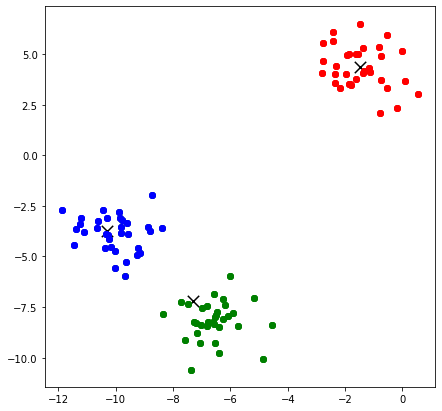

In [24]:
max_iterations = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

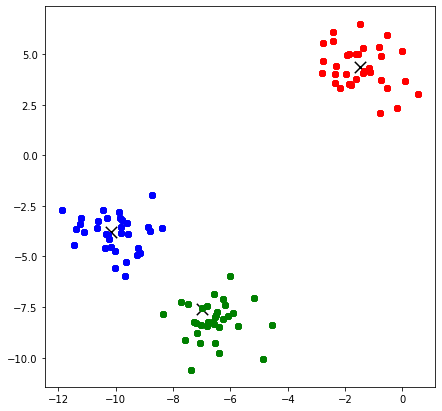

In [25]:
max_iterations = 5

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

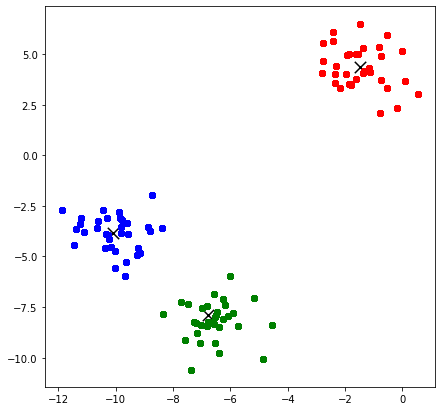

In [26]:
max_iterations = 10

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

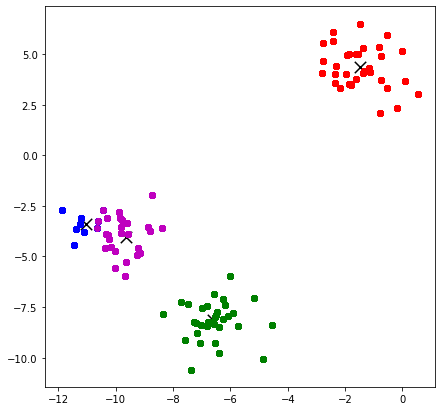

In [27]:
max_iterations = 25

centroids, clusters = kmeans(X, 4, max_iterations, min_distance)

visualize(centroids, clusters)

Далее попробуем обнаружить, что кластер 3(нумерация кластеров идёт с нуля) "лишний" при помощи соотношений значения межкластерной дистанции к внутрикластерной. Подробнее про межкластерные и внутрикластерные расстояния: https://www.geeksforgeeks.org/ml-intercluster-and-intracluster-distance/

In [28]:
intracluster_max={}
for k, v in clusters.items():
  intracluster_max[k]=max((e_metrics(x, y) for i, x in enumerate(v) for y in v[i+1:]))

1) Внутрикластерная дистанция- максимальное расстояние, межкластерная- минимальное расстояние между объектами кластеров.

In [29]:
for k1, v1 in clusters.items():
  for k2, v2 in clusters.items():
    if k1==k2:
      continue
    interclass=min((e_metrics(x, y) for x in v1 for y in v2))
    print(k1, k2, interclass/intracluster_max[k1])
  print('='*20)

0 1 2.0886149590579453
0 2 2.2951374928106785
0 3 1.8924640043579055
1 0 1.2181005013691844
1 2 0.025859988550444777
1 3 0.0
2 0 4.275849330087286
2 1 0.08260708101853449
2 3 0.0
3 0 2.0541029840934235
3 1 0.0
3 2 0.0


2) Внутрикластерная дистанция- максимальное расстояние, межкластерная- максимальное расстояние между объектами кластеров.

In [30]:
for k1, v1 in clusters.items():
  for k2, v2 in clusters.items():
    if k1==k2:
      continue
    interclass=max((e_metrics(x, y) for x in v1 for y in v2))
    print(k1, k2, interclass/intracluster_max[k1])
  print('='*20)

0 1 4.061464005199554
0 2 3.3828999105983386
0 3 3.3717726506363954
1 0 2.3686851995247142
1 2 1.3259566780794048
1 3 1.2047758699016846
2 0 6.302354591737489
2 1 4.235632607474156
2 3 1.6386229328153492
3 0 3.6597622186778263
3 1 2.2422090884337624
3 2 0.9546846252757046


In [31]:
intracluster_average={}
for k, v in clusters.items():
  intracluster_average[k]=sum((e_metrics(x, y) for i, x in enumerate(v) for j, y in enumerate(v) if i!=j))/((len(v)-1)*len(v))

3) Внутрикластерная дистанция- среднее расстояние, межкластерная- среднее расстояние между объектами кластеров.

In [32]:
for k1, v1 in clusters.items():
  for k2, v2 in clusters.items():
    if k1==k2:
      continue
    interclass=sum((e_metrics(x, y) for x in v1 for y in v2))/(len(v1)*len(v2))
    print(k1, k2, interclass/intracluster_average[k1])
  print('='*20)

0 1 8.204673859762574
0 2 7.4835775382561405
0 3 7.122150054605186
1 0 8.76885953705822
1 2 4.243739231405648
1 3 3.382590059745421
2 0 14.692163561193887
2 1 7.795489486359045
2 3 2.1967155789974004
3 0 9.031581189617592
3 1 4.013472097930217
3 2 1.4188941862583622
